### yooo

In [28]:
import pandas as pd
import numpy as np
import os
import logging
import datetime

logging.basicConfig(filename=f"logs/log-{datetime.datetime.now().strftime('%m-%d-%Y %H-%M-%S')}", level=logging.INFO)
logger = logging.getLogger(__name__)


In [30]:
logger.info("test")

In [15]:
mubawab_data = pd.read_excel(os.path.join(os.getcwd(),"day 3/mubawab_data.xlsx"))
print(mubawab_data.head())

         prices                quartiers            spec  \
0    935 000 DH   Bernoussi à Casablanca  Moyen standing   
1  1 866 700 DH  Californie à Casablanca   Haut standing   
2  1 575 000 DH   Belvédère à Casablanca   Haut standing   
3  1 150 000 DH   Belvédère à Casablanca   Haut standing   
4  1 175 640 DH   Aïn Sebaâ à Casablanca  Moyen standing   

                                                 ids       lats     longs  \
0  https://www.mubawab.ma/fr/pa/7284454/apartemen...  33.610409 -7.480356   
1  https://www.mubawab.ma/fr/pa/7902993/superbe-a...  33.528681 -7.613258   
2  https://www.mubawab.ma/fr/pa/7461573/apparteme...  33.585299 -7.598935   
3  https://www.mubawab.ma/fr/pa/7461580/apparteme...  33.585299 -7.598935   
4  https://www.mubawab.ma/fr/pa/7885304/charmant-...  33.604393 -7.541970   

  surfaces nbrs_pieces nbrs_chambres         nbrs_bains  \
0    99 m²    4 Pièces    3 Chambres  2 Salles de bains   
1   113 m²    4 Pièces    3 Chambres  2 Salles de bains   

In [16]:
print("the lenght is : " + str(len(mubawab_data)))
print(mubawab_data.isna().sum())

the lenght is : 14793
prices                  9341
quartiers               9341
spec                   14482
ids                     9341
lats                    9344
longs                   9344
surfaces                9505
nbrs_pieces              519
nbrs_chambres           7990
nbrs_bains             10139
descriptions            9548
types_biens             9505
etats                   5722
etages                 11211
orientations           12541
type_sols              11970
standings              14482
etats_constructions    14448
Livraisons             14793
dtype: int64


In [17]:
print("rate of emptyness : \n" , mubawab_data.isna().sum()/len(mubawab_data))

rate of emptyness : 
 prices                 0.631447
quartiers              0.631447
spec                   0.978977
ids                    0.631447
lats                   0.631650
longs                  0.631650
surfaces               0.642534
nbrs_pieces            0.035084
nbrs_chambres          0.540120
nbrs_bains             0.685392
descriptions           0.645440
types_biens            0.642534
etats                  0.386805
etages                 0.757858
orientations           0.847766
type_sols              0.809166
standings              0.978977
etats_constructions    0.976678
Livraisons             1.000000
dtype: float64


we know now that the columns that should be dropped are (>80% empty): Livraisons, etat_constructions, standings, type_sols, orientations, spec

In [18]:
# lets see the values 
print(mubawab_data["etats_constructions"].value_counts())

etats_constructions
Finalisé                    243
En cours de construction    102
Name: count, dtype: int64


In [19]:
# drop the empy columns
mubawab_data_preprocessed = mubawab_data.copy()
mubawab_data_preprocessed = mubawab_data_preprocessed.drop(["Livraisons", "etats_constructions", "standings", "type_sols", "orientations", "spec"], axis=1)
print("rate of emptyness : \n" , mubawab_data_preprocessed.isna().sum()/len(mubawab_data))

rate of emptyness : 
 prices           0.631447
quartiers        0.631447
ids              0.631447
lats             0.631650
longs            0.631650
surfaces         0.642534
nbrs_pieces      0.035084
nbrs_chambres    0.540120
nbrs_bains       0.685392
descriptions     0.645440
types_biens      0.642534
etats            0.386805
etages           0.757858
dtype: float64


## Converting to numerical data

In [23]:
mub = mubawab_data_preprocessed

print(mubawab_data_preprocessed.dtypes)

print(mubawab_data_preprocessed.head(5))

prices            object
quartiers         object
ids               object
lats             float64
longs            float64
surfaces          object
nbrs_pieces       object
nbrs_chambres     object
nbrs_bains        object
descriptions      object
types_biens       object
etats             object
etages            object
dtype: object
    prices                quartiers  \
0   935000   Bernoussi à Casablanca   
1  1866700  Californie à Casablanca   
2  1575000   Belvédère à Casablanca   
3  1150000   Belvédère à Casablanca   
4  1175640   Aïn Sebaâ à Casablanca   

                                                 ids       lats     longs  \
0  https://www.mubawab.ma/fr/pa/7284454/apartemen...  33.610409 -7.480356   
1  https://www.mubawab.ma/fr/pa/7902993/superbe-a...  33.528681 -7.613258   
2  https://www.mubawab.ma/fr/pa/7461573/apparteme...  33.585299 -7.598935   
3  https://www.mubawab.ma/fr/pa/7461580/apparteme...  33.585299 -7.598935   
4  https://www.mubawab.ma/fr/pa/7885304/c

modifications on ["prices", "surfaces", "nbrs_pieces", "nbrs_chambres", "nbrs_bains"]  (NOT USED NOW)

In [22]:
columns = ["prices", "surfaces", "nbrs_pieces", "nbrs_chambres", "nbrs_bains"]
for col in columns:
    # convert the column to string
    mubawab_data_preprocessed[col].astype(str)
    # split the content of each row by whitespace
    for i in range(len(mubawab_data_preprocessed)):
        print("value : ", mubawab_data_preprocessed.loc[i,col] ," of type : ", type(mubawab_data_preprocessed.loc[i,col]))
        if pd.isna(mubawab_data_preprocessed.loc[i,col]):
            continue
        temp_string_list = mubawab_data_preprocessed.loc[i,col].split()
        super_temp = list(temp_string_list)
        # eliminate alphabet values
        for u in temp_string_list:
            if u.isalpha():
                super_temp.remove(u)
        # make it back to a single string
        mubawab_data_preprocessed.loc[i,col] = "".join(super_temp)
    # convert the string to int
    try:
        mubawab_data_preprocessed[col].astype(int)
    except:
        logger.info("not a numerical to be converted to str")

value :  935 000 DH  of type :  <class 'str'>
value :  1 866 700 DH  of type :  <class 'str'>
value :  1 575 000 DH  of type :  <class 'str'>
value :  1 150 000 DH  of type :  <class 'str'>
value :  1 175 640 DH  of type :  <class 'str'>
value :  1 140 000 DH  of type :  <class 'str'>
value :  1 602 000 DH  of type :  <class 'str'>
value :  1 159 160 DH  of type :  <class 'str'>
value :  À partir de 1 110 000 DH  of type :  <class 'str'>
value :  1 502 500 DH  of type :  <class 'str'>
value :  390 000 DH  of type :  <class 'str'>
value :  Prix à consulter  of type :  <class 'str'>
value :  1 680 000 DH  of type :  <class 'str'>
value :  1 200 000 DH  of type :  <class 'str'>
value :  3 100 000 DH  of type :  <class 'str'>
value :  1 130 000 DH  of type :  <class 'str'>
value :  1 460 000 DH  of type :  <class 'str'>
value :  1 460 000 DH  of type :  <class 'str'>
value :  770 000 DH  of type :  <class 'str'>
value :  1 458 000 DH  of type :  <class 'str'>
value :  1 210 000 DH  of type

KeyboardInterrupt: 

### New preprocessing code

In [25]:
# 1. Strip non‑digits
cleaned = (
    mubawab_data_preprocessed['prices']
      .str.replace(r'[^\d]', '', regex=True)
)

# 2. Convert to numeric, invalid → NaN
mubawab_data_preprocessed['price_DH'] = pd.to_numeric(cleaned, errors='coerce')

# 3. Drop any row missing a price
mubawab_data_preprocessed = (
    mubawab_data_preprocessed
      .dropna(subset=['price_DH'])
      .copy()  # avoid SettingWithCopyWarning
)

# 4. Cast to integer
mubawab_data_preprocessed['price_DH'] = mubawab_data_preprocessed['price_DH'].astype(int)

# Optional: log how many you dropped
dropped = len(cleaned) - len(mubawab_data_preprocessed)
print(f"Dropped {dropped} rows without a valid price.")
logger.info("1.1. Price: remove spaces, “DH”, convert to int")
logger.info(mubawab_data_preprocessed['price_DH'].head())

Dropped 9756 rows without a valid price.


In [31]:
# 1.2. Surface: strip “m²”, convert to float
mubawab_data_preprocessed['surface_m2'] = (
    mubawab_data_preprocessed['surfaces']
      .str.replace(r'[^\d.]', '', regex=True)
      .astype(float)
)
logger.info("1.2. Surface: strip “m²”, convert to float")
logger.info(mubawab_data_preprocessed['surface_m2'].head())

In [34]:
# 1.3. Extract digits → numeric with NaN for failures
mubawab_data_preprocessed['nbr_pieces'] = pd.to_numeric(
    mubawab_data_preprocessed['nbrs_pieces']
        .str.extract(r'(\d+)')[0],
    errors='coerce'
)
mubawab_data_preprocessed['nbr_chambres'] = pd.to_numeric(
    mubawab_data_preprocessed['nbrs_chambres']
        .str.extract(r'(\d+)')[0],
    errors='coerce'
)
mubawab_data_preprocessed['nbr_bains'] = pd.to_numeric(
    mubawab_data_preprocessed['nbrs_bains']
        .str.extract(r'(\d+)')[0],
    errors='coerce'
)

# 2. Drop any row missing *any* of those three counts
before = len(mubawab_data_preprocessed)
mubawab_data_preprocessed = (
    mubawab_data_preprocessed
      .dropna(subset=['nbr_pieces','nbr_chambres','nbr_bains'])
      .copy()   # avoid SettingWithCopyWarning
)
dropped = before - len(mubawab_data_preprocessed)
print(f"Dropped {dropped} rows without valid room/bath counts.")

# 3. Now that there are no NaNs, safely cast to int
for col in ['nbr_pieces','nbr_chambres','nbr_bains']:
    mubawab_data_preprocessed[col] = mubawab_data_preprocessed[col].astype(int)
logger.info("1.3. Number of pieces, chambres, bains")
logger.info(mubawab_data_preprocessed[['nbr_pieces','nbr_chambres','nbr_bains']])

Dropped 0 rows without valid room/bath counts.


In [35]:
# Drop columns that aren’t predictive / too noisy
mubawab_data_preprocessed = mubawab_data_preprocessed.drop(columns=['ids', 'descriptions'])

# Extract neighbourhood name (e.g. “Bernoussi”) and city if needed
mubawab_data_preprocessed['quartier'] = mubawab_data_preprocessed['quartiers'].str.split(' à ').str[0]
logger.info(f"Extract neighbourhood name : \n {mubawab_data_preprocessed['quartier'].head()}")

# Clean ’types_biens’, ’etats’
mubawab_data_preprocessed['types_biens'] = mubawab_data_preprocessed['types_biens'].astype('category')
mubawab_data_preprocessed['etats']      = mubawab_data_preprocessed['etats'].astype('category')

# Parse floor (‘etages’): “2ème” → 2, NaN → a sentinel (e.g. 0)
mubawab_data_preprocessed['etage_num'] = (
    mubawab_data_preprocessed['etages']
      .str.extract(r'(\d+)')
      .fillna(0)
      .astype(int)
)
logger.info(f"Parse floor : \n {mubawab_data_preprocessed['etage_num'].head()}")

# One‑hot encode categoricals
mubawab_data_preprocessed = pd.get_dummies(
    mubawab_data_preprocessed,
    columns=['quartier', 'types_biens', 'etats'],
    drop_first=True
)
logger.info(f"finished : \n {mubawab_data_preprocessed.head()}")

In [38]:
# save df to file 
mubawab_data_preprocessed.to_excel(os.path.join(os.getcwd(),'preprocessed_data/mubawab_data_preprocessed.xlsx'))

## Put everything together and split x and y

In [40]:
# Final feature set
feature_cols = [
    'surface_m2', 'nbr_pieces', 'nbr_chambres', 'nbr_bains',
    'lats', 'longs', 'etage_num'
] + [c for c in mubawab_data_preprocessed.columns if c.startswith(('quartier_','types_biens_','etats_B','etats_H', 'etats_M', 'etats_N', 'etats_À'))]

X = mubawab_data_preprocessed[feature_cols]
y = mubawab_data_preprocessed['price_DH']

logger.info(f"X : \n {X.head()}")
X.to_excel(os.path.join(os.getcwd(),'preprocessed_data/mubawab_data_preprocessed_X.xlsx'))
logger.info(f"Y : \n {y}")
y.to_excel(os.path.join(os.getcwd(),'preprocessed_data/mubawab_data_preprocessed_y.xlsx'))


## Train

/media/data/school shit/SELF_PROJECTS/Housing_casa/.venv/lib64/python3.13/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:18: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


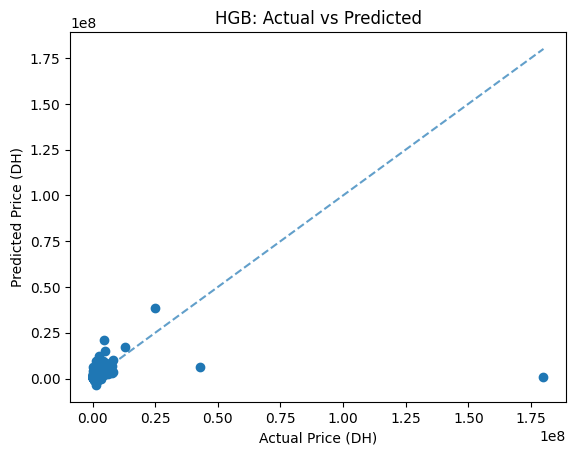

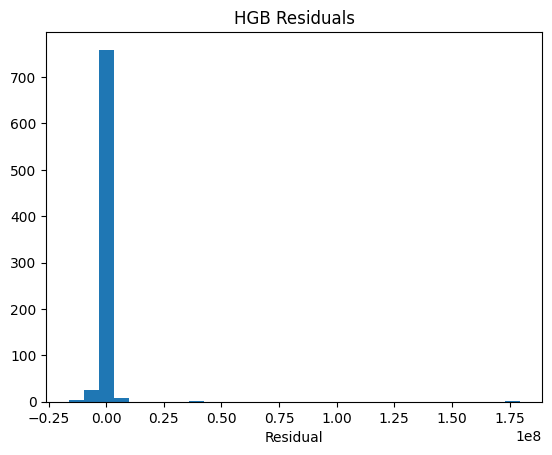

    Actual     Predicted       Residual
0  1100000  8.390502e+05  260949.827923
1  1400000  1.015394e+06  384605.530187
2  2890000  3.554630e+06 -664630.456626
3   650000  7.729692e+05 -122969.152682
4   750000  6.821253e+05   67874.675489
5  1650000  1.761406e+06 -111406.440843
6  1550000  1.343933e+06  206067.172064
7  1200000  1.061643e+06  138357.080407
8  1720000  1.458937e+06  261062.656364
9  1850000  1.986680e+06 -136680.264275


In [43]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# 1) train/test split (as before)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2) instantiate the HGB regressor
hgb = HistGradientBoostingRegressor(
    max_iter=200,       # number of boosting rounds
    learning_rate=0.1,  # step size
    max_depth=None,     # tree depth (None = unlimited)
    random_state=42
)

# 3) train (no NaN errors!)
hgb.fit(X_train, y_train)

# 4) predict
preds = hgb.predict(X_test)

# 5) visualize Actual vs Predicted
plt.figure()
plt.scatter(y_test, preds)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--', alpha=0.7)
plt.xlabel('Actual Price (DH)')
plt.ylabel('Predicted Price (DH)')
plt.title('HGB: Actual vs Predicted')
plt.show()

# 6) residual distribution
resid = y_test - preds
plt.figure()
plt.hist(resid, bins=30)
plt.xlabel('Residual')
plt.title('HGB Residuals')
plt.show()

# 7) peek at some predictions
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': preds,
    'Residual': resid
}).reset_index(drop=True).head(10)
print(comparison)


In [45]:
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    root_mean_squared_error
)

# 1) (Re‑)generate predictions if needed
preds = hgb.predict(X_test)

# 2) Compute metrics
r2   = r2_score(y_test, preds)
mse  = mean_squared_error(y_test, preds)
rmse = root_mean_squared_error(y_test, preds)
mae  = mean_absolute_error(y_test, preds)

# 3) Print them
print(f"R² Score: {r2:.4f}")
print(f"MSE:      {mse:,.2f}")
print(f"RMSE:     {rmse:,.2f}")
print(f"MAE:      {mae:,.2f}")


R² Score: -0.0022
MSE:      44,401,536,347,552.23
RMSE:     6,663,447.78
MAE:      967,230.16


we have a very bad model , let's check the data

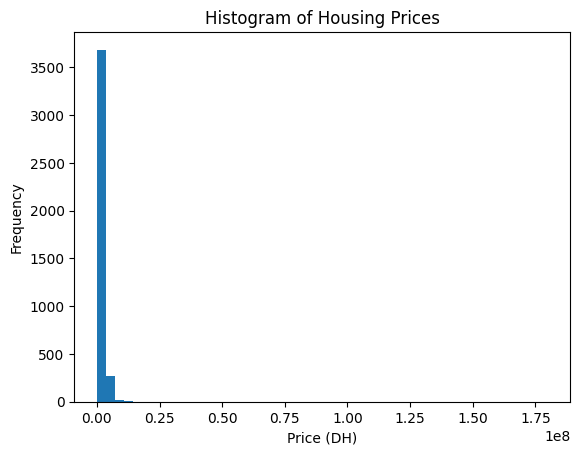

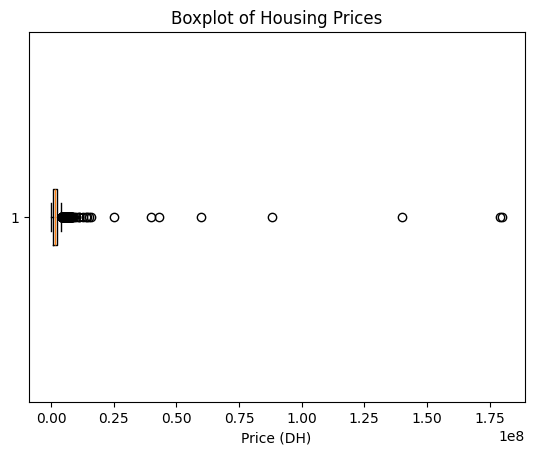

1st percentile: 10,000 DH
99th percentile: 6,810,000 DH
Dropped 79 outlier rows; 3902 remain.


In [46]:
import matplotlib.pyplot as plt

# 1) Plot histogram of prices
plt.figure()
plt.hist(mubawab_data_preprocessed['price_DH'], bins=50)
plt.xlabel('Price (DH)')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Prices')
plt.show()

# 2) Plot boxplot to identify extreme values
plt.figure()
plt.boxplot(mubawab_data_preprocessed['price_DH'], vert=False)
plt.xlabel('Price (DH)')
plt.title('Boxplot of Housing Prices')
plt.show()

# 3) Compute percentile thresholds
lower_pct = mubawab_data_preprocessed['price_DH'].quantile(0.01)
upper_pct = mubawab_data_preprocessed['price_DH'].quantile(0.99)
print(f"1st percentile: {lower_pct:,.0f} DH")
print(f"99th percentile: {upper_pct:,.0f} DH")

# 4) Filter out the extreme 1% on both ends
df_filtered = mubawab_data_preprocessed[
    mubawab_data_preprocessed['price_DH'].between(lower_pct, upper_pct)
].copy()
print(f"Dropped {len(mubawab_data_preprocessed) - len(df_filtered)} outlier rows; "
      f"{len(df_filtered)} remain.")


## re-train

After outlier removal:
  R²   = 0.7832
  MSE  = 272,162,163,797.90
  RMSE = 521,691.64
  MAE  = 326,278.82


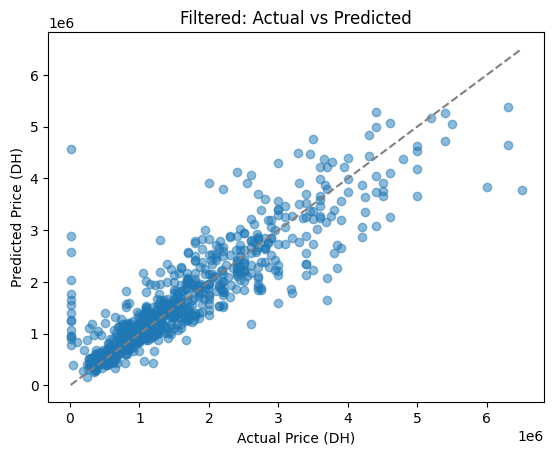

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# 1) Prepare features & target from filtered dataframe
feature_cols = [
    'surface_m2', 'nbr_pieces', 'nbr_chambres', 'nbr_bains',
    'lats', 'longs', 'etage_num'
] + [c for c in df_filtered.columns if c.startswith(('quartier_','types_biens_','etats_'))]

X_filt = df_filtered[feature_cols]
y_filt = df_filtered['price_DH']

# 2) Train/test split
X_tr, X_te, y_tr, y_te = train_test_split(
    X_filt, y_filt, test_size=0.2, random_state=42
)

# 3) Train a HistGradientBoostingRegressor
hgb = HistGradientBoostingRegressor(
    max_iter=200, learning_rate=0.1, random_state=42
)
hgb.fit(X_tr, y_tr)

# 4) Predict & evaluate
preds = hgb.predict(X_te)
r2   = r2_score(y_te, preds)
mse  = mean_squared_error(y_te, preds)
rmse = root_mean_squared_error(y_te, preds)
mae  = mean_absolute_error(y_te, preds)

print(f"After outlier removal:")
print(f"  R²   = {r2:.4f}")
print(f"  MSE  = {mse:,.2f}")
print(f"  RMSE = {rmse:,.2f}")
print(f"  MAE  = {mae:,.2f}")

# 5) Quick Actual vs Predicted plot
plt.figure()
plt.scatter(y_te, preds, alpha=0.5)
plt.plot([y_te.min(), y_te.max()],
         [y_te.min(), y_te.max()],
         linestyle='--', color='grey')
plt.xlabel('Actual Price (DH)')
plt.ylabel('Predicted Price (DH)')
plt.title('Filtered: Actual vs Predicted')
plt.show()


## Log‑transform the target
Price distributions are right‑skewed; modeling y = log(price) often stabilizes variance and yields better predictions. For example:

In [48]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

# 1) Transform target
y_log = np.log1p(df_filtered['price_DH'])

# 2) Split
X_tr, X_te, y_tr_log, y_te_log = train_test_split(
    X_filt, y_log, test_size=0.2, random_state=42
)

# 3) Train
hgb = HistGradientBoostingRegressor(max_iter=200, learning_rate=0.1, random_state=42)
hgb.fit(X_tr, y_tr_log)

# 4) Predict and invert transform
preds_log = hgb.predict(X_te)
preds = np.expm1(preds_log)

# 5) Evaluate on original scale
print("R²:", r2_score(df_filtered['price_DH'].loc[y_te_log.index], preds))
print("MAE:", mean_absolute_error(df_filtered['price_DH'].loc[y_te_log.index], preds))


R²: 0.7317397830546915
MAE: 359611.10419272917


## Insights

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance

# — assume these exist in your session:
# df_filtered         # DataFrame after price outlier removal
# X                   # your feature matrix from df_filtered
# y                   # df_filtered['price_DH']
# hgb                 # the HistGradientBoostingRegressor already .fit()

# 1) Compute permutation importances on your test set
#    (or split a quick X_te, y_te if you haven’t already)
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

perm = permutation_importance(
    hgb, X_te, y_te,
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)
imp = pd.Series(perm.importances_mean, index=X.columns).sort_values(ascending=False)

# Plot top 10
top10 = imp.head(10)
plt.figure()
plt.bar(range(len(top10)), top10)
plt.xticks(range(len(top10)), top10.index, rotation=45, ha='right')
plt.title('Top 10 Permutation Importances')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# 2) Average price by neighborhood
neigh = df_filtered['quartiers'].str.split(' à ').str[0]
avg_price = (df_filtered
             .assign(neighborhood=neigh)
             .groupby('neighborhood')['price_DH']
             .mean()
             .sort_values(ascending=False))

plt.figure()
avg_price.head(10).plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price (DH)')
plt.title('Top 10 Neighborhoods by Average Price')
plt.tight_layout()
plt.show()

# 3) Scatter map of Casablanca
plt.figure()
sc = plt.scatter(
    df_filtered['longs'],
    df_filtered['lats'],
    c=df_filtered['price_DH'],
    cmap='viridis',
    s=20,
    alpha=0.6
)
plt.colorbar(sc, label='Price (DH)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Casablanca Housing Price Map')
plt.tight_layout()
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- etats_2ème
- etats_3ème
- etats_4ème
- etats_5ème
- etats_6ème
- ...
